# Trying to find some CHE stars that look like HD5980 in Pablos grid

(L van son May 2020)

## Properties of HD5980:
SMC metallicity
P = 19.2656 $\pm$ 0.0008 d <br>
Ma = 61 $\pm$ 10 Msun <br>
Mb = 66 $\pm$ 10 Msun <br>

***
e = 0.27 $\pm$ 0.002 <br>
i = 86 degree <br>
Rl = 57 Rsun <br>

***
log(L/Lsun)= 6.3  <br>
Teff = 63 *1e3  <br>
Ra = 24 Rsun  <br>
Rb = 16 Rsun  <br>



In [1]:
from astropy.table import vstack, Table
from astropy import units as u
from astropy import constants as const

import os
import h5py

import numpy as np
import scipy.stats as stats

#Plotting parameters
import matplotlib
from matplotlib import rc
from matplotlib import gridspec
from matplotlib.legend import Legend
import matplotlib.pyplot as plt

# import mesaPlot as mp

## Use propper fontsizes & Latex ##
from matplotlib import rc
fsize = 30
SMALL_SIZE = 25
MEDIUM_SIZE = 25
BIGGER_SIZE = 30
# Use Latex in plotting
# pgf_with_rc_fonts = {"pgf.texsystem": "pdflatex"}
# matplotlib.rcParams.update(pgf_with_rc_fonts)

# plt.rc('text', usetex=True)
# plt.rc('font', **{'family':'serif','serif':['Times'],'size'   : fsize})
# matplotlib.rcParams.update(pgf_with_rc_fonts)

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#Colors for plotting
colors = plt.cm.Set2(np.linspace(0,1,10)) #3rd num is the number of colours

#Directory of project
home_dir = '/n/home04/lvanson/'
proj_dir = home_dir + '/ProjectKatieSharpe/'



In [2]:
#Plot the HR diagram with different colour values
def HR_diagram(history, colour_by = 'star_age',colorstr ='',save_loc = './', colors = 'rainbow',numdir=0,  Vmin = 'auto', Vmax = 'auto', x_lim = (3.9,4.5), y_lim = (1.25, 4.25), subplot= False, ax = None):
    colors = ['rainbow', r'rainbow']#[purples, YlRed]
    if history == None:
        return None
    try: 
        kleur = history[colour_by]
        colorstr = colour_by
    except: 
        kleur = colour_by
    
    #If you are using this as part of other plots, subplot = True
    if not subplot:
        fig, ax = plt.subplots(figsize=(10,10))

    mzams = 'M$_{i}$ '+str(round(history['star_mass'][0],2) )+'M$_{\odot}$'
    try:
        Pzams = 'P$_{i}$ '+str(round(history['period_days'][0],1) )+ 'd'
    except:
        Pzams = 'P$_{i}$ '+str(-1)+ 'd'
       
    print(mzams, Pzams)
    if Vmin == 'auto':
        Vmin = min(kleur)
    if Vmax == 'auto':
        Vmax = max(kleur) 

    history['star_age'] = history['star_age']*1e-6 #in Myr
    history['dM']  = history['star_mass'][0] - history['star_mass']

    #############    #############    ############# 
#     ax.scatter(history['log_Teff'][0], history['log_L'][0],marker = '*',s = 200, edgecolor = 'k',label = None,c = 'yellow',alpha = 1., zorder = 50) 
#     ax.text(history['log_Teff'][-1], history['log_L'][-1], str(numdir), size = 15, zorder = 50) 
#     ax.text(history['log_Teff'][0]- 0.01, history['log_L'][0], mzams+', '+Pzams)

    im = ax.scatter(history['log_Teff'], history['log_L']\
                ,marker = 'o',s = 7,label = None, c = kleur, cmap = colors[0] ,alpha = 0.75,vmin=Vmin, vmax= Vmax) # 
    cb = plt.colorbar(im, ax = ax)
    cb.set_label(mzams + colorstr, size = 25)
    cb.ax.tick_params(labelsize=20)

    if y_lim:
        ax.set_ylim(y_lim)
    if x_lim:
        ax.set_xlim(x_lim)

    ax.set_ylabel('log$_{10}$(L/L$_{\odot}$)',fontsize = 22)
    ax.set_xlabel('log$_{10}$(T$_{eff}$/K)',fontsize = 22)
    ax.tick_params(axis='both', which='major', labelsize=20)
#     ax.legend(loc = 'lower left', fontsize = 'large')
    ax.invert_xaxis()
    
    if subplot:
        return im
    plt.tight_layout()
#     try:
#         plt.savefig(basedir+ save_loc+'HR'+colour_by+'.png')
#     except:
#         os.mkdir(basedir + save_loc)#,0o775)
#         plt.savefig(basedir+ save_loc+'HR'+colour_by+'.png')

#     plt.close()
#     plt.show()
    return im



# At SMC metallicity  Z= 0.004
(Pablo actually uses Zsun = 0.017 ==> Zsun/4 = 0.00425)


2.0_1.00_1.60/
/n/home04/lvanson//CHEtriples/Marchant2016Inlists/double_bh_Z04/2.0_1.00_1.60//
/n/home04/lvanson//CHEtriples/Marchant2016Inlists/double_bh_Z04/2.0_1.00_1.60///binary_history.data.s
<Table length=1844>
         name           dtype 
---------------------- -------
          model_number float64
                   age float64
           period_days float64
     binary_separation float64
                  rl_1 float64
                  rl_2 float64
rl_relative_overflow_1 float64
rl_relative_overflow_2 float64
           star_1_mass float64
           star_2_mass float64
     lg_mtransfer_rate float64
        lg_mstar_dot_1 float64
        lg_mstar_dot_2 float64
      lg_system_mdot_1 float64
      lg_system_mdot_2 float64
        lg_wind_mdot_1 float64
        lg_wind_mdot_2 float64
                 J_orb float64
                  Jdot float64
               jdot_mb float64
               jdot_gr float64
               jdot_ml float64
               jdot_ls float64
     jdo

/n/helmod/apps/centos7/Core/Anaconda3/5.0.1-fasrc02/x/lib/python3.6/site-packages/astropy/table/table.py:2628: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other


M$_{i}$ 100.0M$_{\odot}$ P$_{i}$ -1d


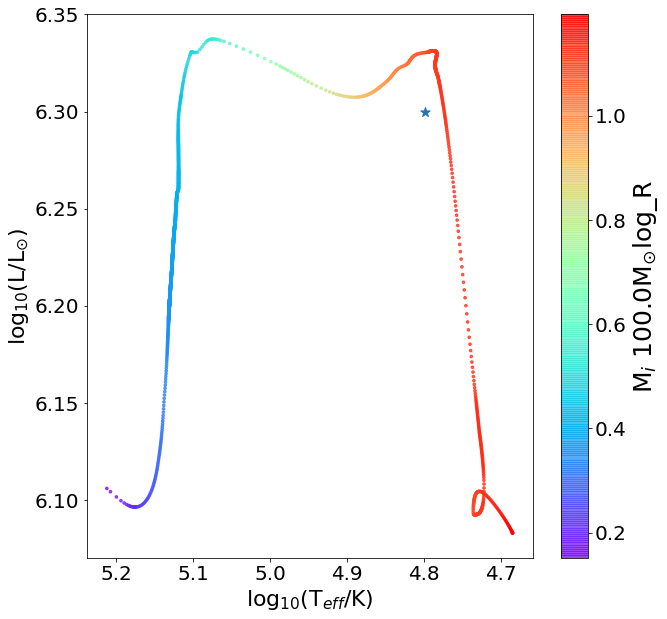

M$_{i}$ 100.0M$_{\odot}$ P$_{i}$ -1d


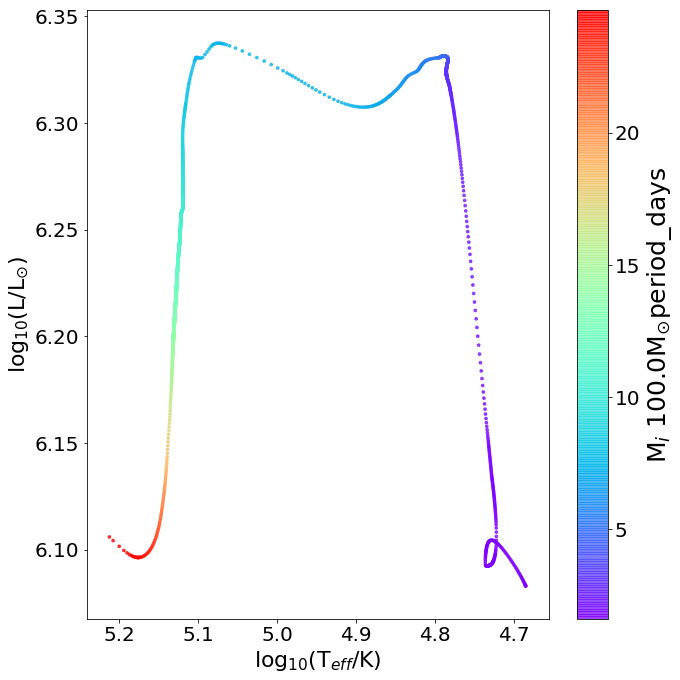

In [3]:
import PlotMESAfunctions as pm

logInitM = 2.0#1.9
InitQ = '1.00'#'0.90'
InitP = '1.60'#'1.60'
Star_dir = str(logInitM)+'_'+str(InitQ)+'_'+str(InitP)+'/'
print(Star_dir)
StarN = 1

sim_dir = home_dir + '/CHEtriples/Marchant2016Inlists/double_bh_Z04/'
file_loc = sim_dir + Star_dir +'/' 
print(file_loc)

# HISTORY DATA
history = Table.read(file_loc + 'LOGS'+str(StarN)+'/history.data.s',format='csv',header_start = 4, data_start=5, delimiter = ' ')
history2 = Table.read(file_loc + 'LOGS'+str(2)+'/history.data.s',format='csv',header_start = 4, data_start=5, delimiter = ' ')
print(file_loc +'/binary_history.data.s')
#BINARY DATA
Binary_history = Table.read(file_loc +'/binary_history.data.s',format='csv',header_start = 4, data_start=5, delimiter = ' ')

Binary_history.info()
Binary_history = Binary_history[1:]
history.info()

print('Mmin:', min(history['star_mass']),'Mmax:', max(history['star_mass']))
print('Pinit', Binary_history['period_days'][0], 'Pfinal', Binary_history['period_days'][-1])


fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(np.log10(63*1e3), 6.3, marker = '*', s =100)
im = HR_diagram(history, colour_by = 'log_R', colors = 'rainbow', x_lim = None, y_lim = None, subplot= True, ax = ax)#surf_avg_j_rot
plt.show()


## PLOT WITH PERIOD AS COLOUR
im = HR_diagram(history, colour_by = Binary_history['period_days'],colorstr='period_days', colors = 'rainbow', x_lim = None, y_lim = None, subplot= False)#surf_avg_j_rot

plt.show()






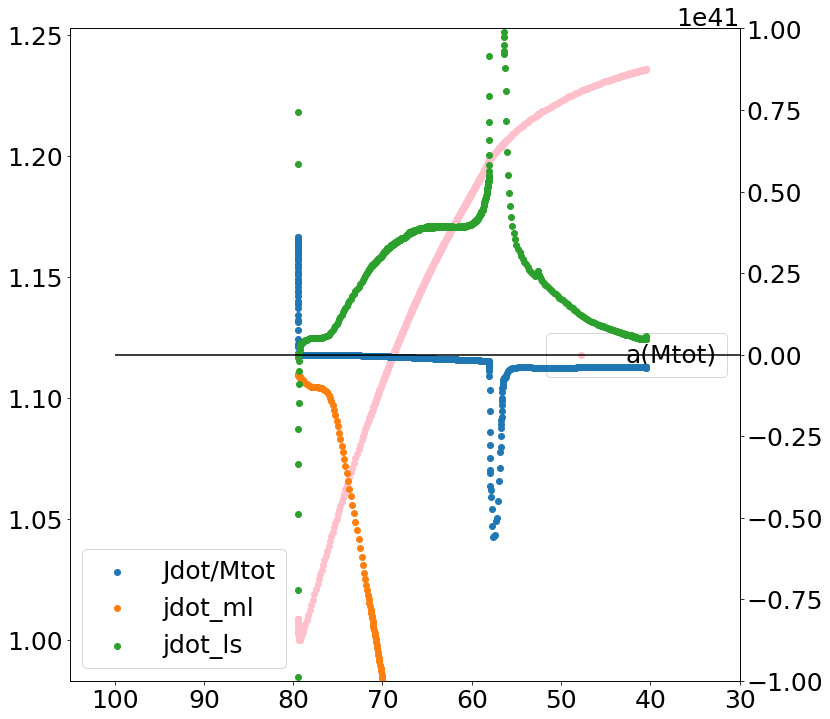

In [9]:
Binary_history['Mtot'] = Binary_history['star_1_mass'] + Binary_history['star_2_mass']


# plt.scatter(history['star_age'], history['jdot_mb'])
fig, ax = plt.subplots(figsize = (12,12) )
ax2 = ax.twinx()

# ax.scatter(Binary_history['star_1_mass'], Binary_history['J_orb'], label = 'J_orb', c = 'r')
#Binary_history['binary_separation']*Binary_history['Mtot']/min(Binary_history['binary_separation']*Binary_history['Mtot'])


ax.scatter(Binary_history['star_1_mass'],  Binary_history['binary_separation']*Binary_history['Mtot']/min(Binary_history['binary_separation']*Binary_history['Mtot']),           label = 'a(Mtot)', c = 'pink')

# ax.scatter(Binary_history['star_1_mass'],  (2*np.pi)/Binary_history['period_days'],
#            label = 'omega', c = 'purple')


ax2.scatter(Binary_history['star_1_mass'], Binary_history['Jdot']/Binary_history['Mtot'], label = 'Jdot/Mtot')
ax2.scatter(Binary_history['star_1_mass'], Binary_history['jdot_ml'], label = 'jdot_ml')
ax2.scatter(Binary_history['star_1_mass'], Binary_history['jdot_ls'], label = 'jdot_ls')
# ax2.scatter(Binary_history['star_1_mass'], Binary_history['jdot_gr'], label = 'jdot_gr', c = 'r')

plt.hlines(y = 0, xmin = 30, xmax = 100)


# ax.scatter(Binary_history['star_1_mass'], Binary_history['jdot_missing_wind'], label = 'jdot_missing_wind')
plt.xlabel('star_1_mass')
# ax2.set_ylabel('Jdot')
# ax.set_ylabel('specific j')
ax.legend(loc = 'center right')
ax2.legend(loc = 'lower left')
# plt.yscale('log')
# ax.set_ylim(-6,-3)
ax2.set_ylim(-0.1e42,0.1e42)

plt.xlim(105,30)
plt.show()

#  float64
#            jdot_gr float64
#            jdot_ml float64
#            jdot_ls float64
        
#         jdot_missing_wind

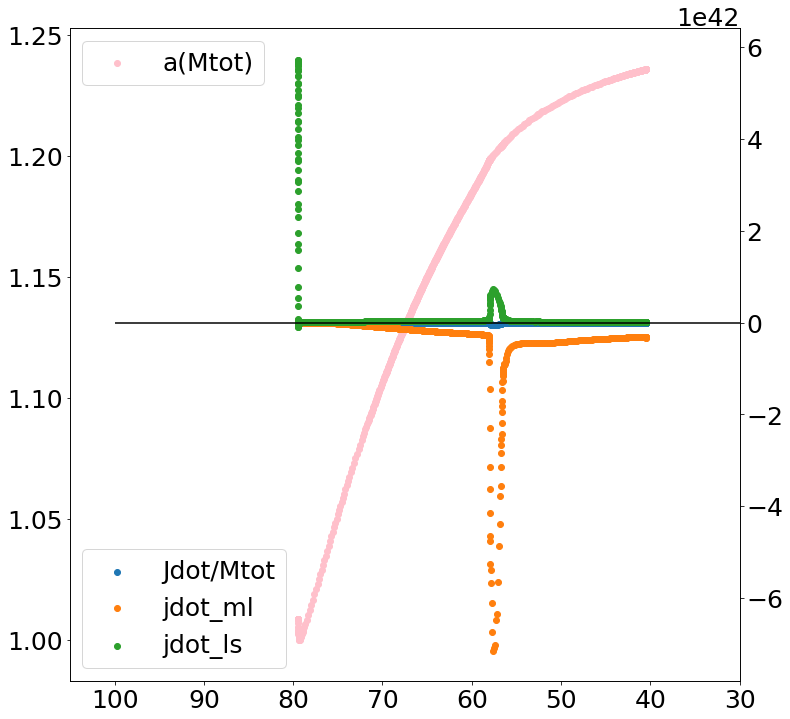

In [10]:

Binary_history['Mtot'] = Binary_history['star_1_mass'] + Binary_history['star_2_mass']


# plt.scatter(history['star_age'], history['jdot_mb'])
fig, ax = plt.subplots(figsize = (12,12) )
ax2 = ax.twinx()

# ax.scatter(Binary_history['star_1_mass'], Binary_history['J_orb'], label = 'J_orb', c = 'r')
ax.scatter(Binary_history['star_1_mass'],  Binary_history['binary_separation']*Binary_history['Mtot']/min(Binary_history['binary_separation']*Binary_history['Mtot']),           label = 'a(Mtot)', c = 'pink')


# ax.scatter(history['star_mass'], history['log_R'],
#            label = 'log_R', c = 'pink')


ax2.scatter(Binary_history['star_1_mass'], Binary_history['Jdot']/Binary_history['Mtot'], label = 'Jdot/Mtot')
ax2.scatter(Binary_history['star_1_mass'], Binary_history['jdot_ml'], label = 'jdot_ml')
ax2.scatter(Binary_history['star_1_mass'], Binary_history['jdot_ls'], label = 'jdot_ls')
# ax2.scatter(Binary_history['star_1_mass'], Binary_history['jdot_gr'], label = 'jdot_gr', c = 'r')

plt.hlines(y = 0, xmin = 30, xmax = 100)


# ax.scatter(Binary_history['star_1_mass'], Binary_history['jdot_missing_wind'], label = 'jdot_missing_wind')
plt.xlabel('star_1_mass')
# ax2.set_ylabel('Jdot')
# ax.set_ylabel('specific j')
ax.legend()
ax2.legend(loc = 'lower left')
# plt.yscale('log')
# ax.set_ylim(-6,-3)

plt.xlim(105,30)
plt.show()




# At Zsun/10 metallicity  Z= 0.0014
(Pablo actually uses Zsun = 0.017 ==> Zsun/10 = 0.0017)


/n/home04/lvanson//CHEtriples/Marchant2016Inlists/double_bh_Z10/1.9_1.00_1.50//
/n/home04/lvanson//CHEtriples/Marchant2016Inlists/double_bh_Z10/1.9_1.00_1.50///binary_history.data.s
<Table length=787>
         name           dtype 
---------------------- -------
          model_number float64
                   age float64
           period_days float64
     binary_separation float64
                  rl_1 float64
                  rl_2 float64
rl_relative_overflow_1 float64
rl_relative_overflow_2 float64
           star_1_mass float64
           star_2_mass float64
     lg_mtransfer_rate float64
        lg_mstar_dot_1 float64
        lg_mstar_dot_2 float64
      lg_system_mdot_1 float64
      lg_system_mdot_2 float64
        lg_wind_mdot_1 float64
        lg_wind_mdot_2 float64
                 J_orb float64
                  Jdot float64
               jdot_mb float64
               jdot_gr float64
               jdot_ml float64
               jdot_ls float64
     jdot_missing_wind f

/n/helmod/apps/centos7/Core/Anaconda3/5.0.1-fasrc02/x/lib/python3.6/site-packages/astropy/table/table.py:2628: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other


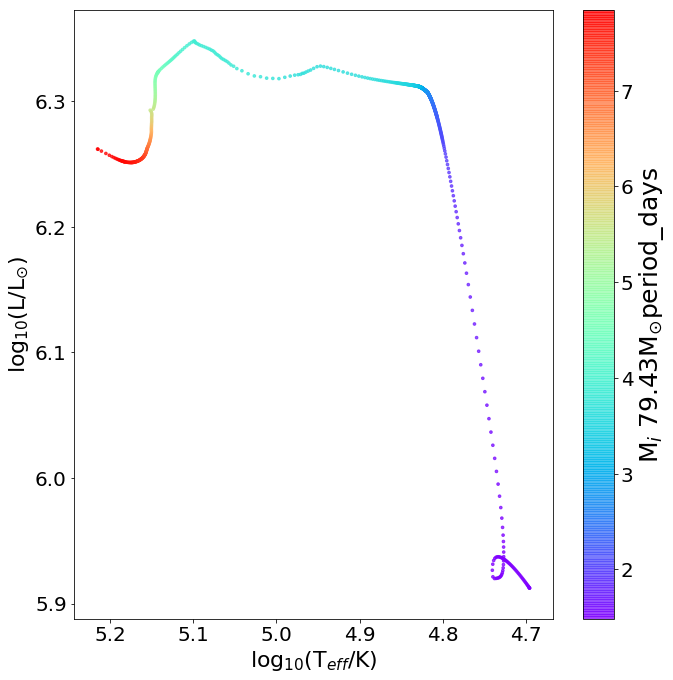

M$_{i}$ 79.43M$_{\odot}$ P$_{i}$ -1d


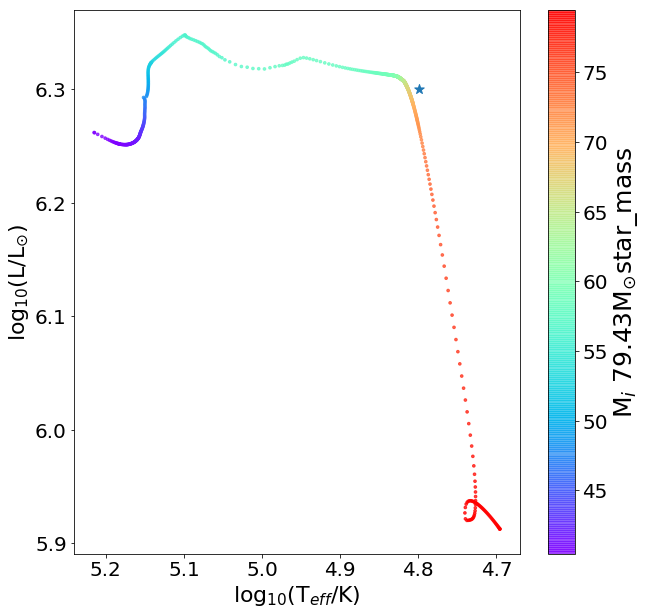

In [6]:
import PlotMESAfunctions as pm

logInitM = 1.9
InitQ = '1.00'#'0.90'
InitP = '1.50'#'1.60'
Star_dir = str(logInitM)+'_'+str(InitQ)+'_'+str(InitP)+'/'
StarN = 1

sim_dir = home_dir + '/CHEtriples/Marchant2016Inlists/double_bh_Z10/'
file_loc = sim_dir + Star_dir +'/' 
print(file_loc)

# HISTORY DATA
history = Table.read(file_loc + 'LOGS'+str(StarN)+'/history.data.s',format='csv',header_start = 4, data_start=5, delimiter = ' ')
history2 = Table.read(file_loc + 'LOGS'+str(2)+'/history.data.s',format='csv',header_start = 4, data_start=5, delimiter = ' ')
print(file_loc +'/binary_history.data.s')
#BINARY DATA
Binary_history = Table.read(file_loc +'/binary_history.data.s',format='csv',header_start = 4, data_start=5, delimiter = ' ')


Binary_history.info()
# history.info()

print('Mmin:', min(history['star_mass']),'Mmax:', max(history['star_mass']))
print('Pinit', Binary_history['period_days'][0], 'Pfinal', Binary_history['period_days'][-1])

im = HR_diagram(history, colour_by = Binary_history['period_days'],colorstr='period_days', colors = 'rainbow', x_lim = None, y_lim = None, subplot= False)#surf_avg_j_rot

plt.show()

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(np.log10(63*1e3), 6.3, marker = '*', s =100)
im = HR_diagram(history, colour_by = 'star_mass', colors = 'rainbow', x_lim = None, y_lim = None, subplot= True, ax = ax)#surf_avg_j_rot
plt.show()



In [7]:
# m=mp.MESA()
# m.loadHistory(f=file_loc)
# p=mp.plot()
# p.plotHistory(m,xaxis='star_age',y1='log_center_T',y2='he_core_mass')




# 1.5_0.90_1.60/LOGS2
# grid_loc = 
# print(group)
# import h5py

# fileloc = input_dir + simname
# #home_dir + 'COMPASoutput/'+ sim +'N1E'+str(int(np.log10(number_of_binaries)))+'x' + str(Nbatch) 
# print('Reading from: ', fileloc + '/COMPAS_Output.h5')
# f = h5py.File(fileloc + '/COMPAS_Output.h5', 'r')
# print(f.keys())

# ## Load the data and put it into the astropy table ##
# subFile = f[group]
# for key in subFile.keys():
#     try:
#         table[key] = subFile[key]
#     except:
#         table[key] = subFile[key][:,0]  

# if group == 'DoubleCompactObjects':
#     table['Mtot'] = table['Mass_1'] + table['Mass_2']

# return table

In [8]:
#open a hisory or profile and put it into an astropy table
def read_file(name, basedir, pnum = 10):
    if 'profile' in name:
        name += str(pnum)
#     print(basedir, name)
    #open file and get column names
    file = open(basedir +name+'.data', "r")
    star_age = -999
    for i, line in enumerate(file):
        if 'profile' in name and i == 2:
            ster_info =	np.array(line.split())
            star_age = np.float32(ster_info[4]) #second to year
#             print('ster_info',ster_info)
        if i == 5: 
            ColName = np.array(line.split())
            break
    #put data in correct columns, and organise in table format
    data = np.loadtxt(basedir +name+'.data',  comments='#', converters=None, skiprows=6, unpack =True)
    t = Table()
    for j, nome in enumerate(ColName):
        try:
            t[nome] = data[j]
        except:
            print('You couldnt read this file:', basedir +name+'.data' )
            return None,None
    return t, star_age

# logsdir = basedir + '/IntermediateMassContactGrid/P0d5_1d5_M25_50_0d1Zsun/1/LOGS1/' #'/work/LOGS/'
# # history = Table.read(logsdir +'/history.data',format='csv',header_start = 4, data_start=5, delimiter = ' ')
# history, age = read_file('history', logsdir, pnum = 1)
# # history.info()
